In [1]:
import cv2, time
import matplotlib.pyplot as plt
import numpy as np
import Vision as vis

In [2]:
cap = cv2.VideoCapture(0) 

In [3]:
env = vis.takePicture()

In [4]:

def color_mask(imgRGB, color):
    img_hsv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)

    if color == 'red':
        mask = cv2.inRange(img_hsv, lower_red, upper_red)
    if color == 'green':
        mask = cv2.inRange(img_hsv, lower_green, upper_green)
    if color == 'cyan':
        mask = cv2.inRange(img_hsv, lower_cyan, upper_cyan)
    if color == 'pink':
        mask = cv2.inRange(img_hsv, lower_cyan, upper_cyan)
        
    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0
    
    return output_hsv

In [4]:
lower_green=np.array([30,40,40]) #only one that we tested
upper_green=np.array([70,255,255])
output = vis.color_mask(env, 'green')
plt.figure()
plt.imshow(output)
plt.show()

NameError: name 'env' is not defined

4


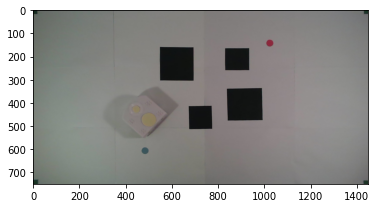

In [7]:
env = cv2.imread('env_final.jpeg')
env = cv2.cvtColor(env, cv2.COLOR_BGR2RGB)
new_env = vis.img_calibration(env)
plt.figure()
plt.imshow(new_env)
plt.show()

4


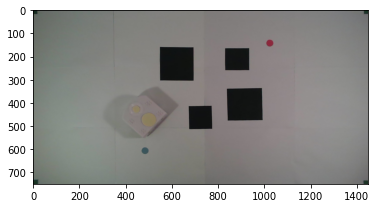

In [8]:
env2 = cv2.imread('env_final.jpeg')
env2 = cv2.cvtColor(env2, cv2.COLOR_BGR2RGB)
new_env2 = vis.img_calibration(env2)
plt.figure()
plt.imshow(new_env2)
plt.show()